<a href="https://colab.research.google.com/github/shintatriya1/sentimen/blob/master/Skripsi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install Sastrawi

     |████████████████████████████████| 215kB 5.0MB/s 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv('https://raw.githubusercontent.com/shintatriya1/analisa_sentimen/master/datalirik3b.csv')

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['label'] = df['label'].map({'positif': 0, 'negatif': 1}) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 

#Create factory
stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan', 'ia','bahwa','oleh','apa','kau','tak']
 
# Tambahkan Stopword Baru
data = stop_factory.get_stop_words()+more_stopword
 
stopword = stop_factory.create_stop_word_remover()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0 lihat cara jalan kagum kagum ikut jalan pikir kesan kesan sekali tunjuk betapa arti senyum ikut gerak jari kau kan kes kau kan kes dengar mulai nyanyi kau kan haru lalu bisu sekali kata betapa arti tingkah karna aku slalu kagum hati tiap jengkal indah tiap jengkal buruk karna aku slalu ikut lewat mimpi tiap sudut terang tiap sudut gelap karna aku slalu kagum hati tiap jengkal indah tiap jengkal buruk karna aku slalu ikut lewat mimpi tiap sudut terang tiap sudut gelap
0 ku dengar kini kau tak benak timbul tanya hati bertahta singgah hati siap kau tuk jatuh cinta meski bibir tak kata bukan arti ku tak rasa beda tak mungkin ku lewat diri tak mampu bicara aku kau hidup kini ku tak tak rasa aku siap kau bertahta hati hai cinta tepat singgah hati siap kau tuk jatuh cinta meski bibir tak kata bukan arti ku tak rasa beda tak mungkin ku lewat diri tak mampu bicara aku kau hidup pikir dulu hingga tiada ragu mulus jalan lang tuju hati pikir dulu hingga tiada ragu mulus jalan lang tuju hati siap

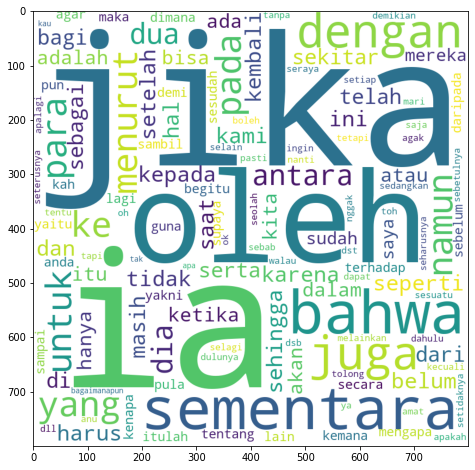

In [12]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
count_row = df.shape[0]
for ind in df.index: 
     ##print(df['label'][ind], df['text'][ind])
     katadasar = stopword.remove(stemmer.stem(df['text'][ind]))
     df['text'][ind]= katadasar
     print(df['label'][ind], df['text'][ind])
     df.head(10)
comment_words = ' '
for words in data:
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800,
                       background_color = 'white',
                       min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)

In [20]:
X= df['text']
y = df['label']  
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
#Naive Bayes Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred
knn.predict_proba(X_test)
print(confusion_matrix(y_test, y_pred))

[[ 2 12]
 [ 0 16]]


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       0.57      1.00      0.73        16

    accuracy                           0.60        30
   macro avg       0.79      0.57      0.49        30
weighted avg       0.77      0.60      0.50        30



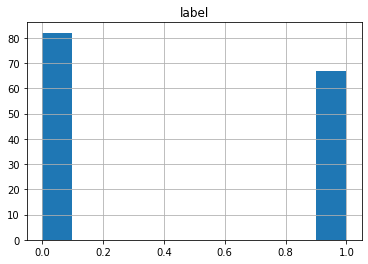

In [22]:
df.hist()
 
plt.show()